## 청소년 범죄 영향 인자 분석

In [51]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt

In [52]:
n_crime = pd.read_csv('../data/nightlife_crime.csv', encoding='euc-kr')
t_crime = pd.read_csv('../data/crime_teenager.csv', encoding='euc-kr')

In [79]:
## 그래프 한글 폰트 패치
import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system() == "Darwin":
    rc('font',family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('Unknown system')

In [53]:
n_crime.head()

,region,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot
0,강남,283,354,637,0,0,9,67,37,3,15,300,2411,2465
1,강동,146,106,252,0,3,6,193,158,4,6,156,2366,2712
2,강북,79,128,207,0,0,9,166,210,7,14,153,1434,2649
3,강서,113,167,280,0,3,9,273,240,7,13,262,2096,3207
4,관악,223,99,322,0,2,14,170,209,9,12,320,2706,3298


In [54]:
t_crime.head()

,location,murder,robbery,forcible_rape,thief,violence
0,중 부,0,0,1,44,42
1,종 로,0,3,4,34,57
2,남대문,0,0,0,43,4
3,서대문,0,4,5,142,103
4,혜 화,0,2,2,38,29


In [55]:
## 컬럼 이름 변경
t_crime.rename(columns={'location': '구별', 'murder': '살인', 'robbery': '강도', 'forcible_rape': '강간', 'thief': '절도', 'violence': '폭행'}, inplace=True)

#### 범죄 발생건 수

In [56]:
print("전체 살인범죄 발생 건수 : %d" %(t_crime['살인']).sum())
print("전체 강도범죄 발생 건수 : %d" %(t_crime['강도']).sum())
print("전체 강간범죄 발생 건수 : %d" %(t_crime['강간']).sum())
print("전체 절도범죄 발생 건수 : %d" %(t_crime['절도']).sum())
print("전체 폭행범죄 발생 건수 : %d" %(t_crime['폭행']).sum())

전체 살인범죄 발생 건수 : 3
전체 강도범죄 발생 건수 : 57
전체 강간범죄 발생 건수 : 243
전체 절도범죄 발생 건수 : 3685
전체 폭행범죄 발생 건수 : 3619


#### 구별 범죄 발생 건 수

In [61]:
def gu_total(x):
    result = x[0]+x[1]+x[2]+x[3]+x[4]
    return result

# 구별 범죄발생건수 합계 열 생성
t_crime['합계'] = t_crime[['살인','강도','강간','절도','폭행']].apply(gu_total,axis=1)

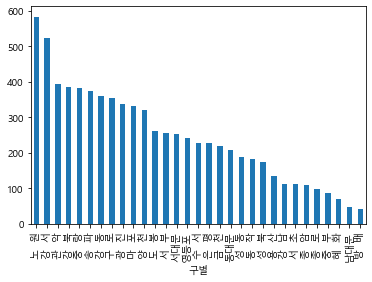

In [80]:
# 구별 범죄 발생 건 수 파악

gu_grouped_1 = t_crime.groupby('구별')['합계'].sum().sort_values(ascending=False)
plt.figsize
gu_grouped_1.plot(kind='bar')